# Neural Network Library - Complete Project Demo

CSE473s: Computational Intelligence - Fall 2025

## Overview

This notebook demonstrates a complete neural network library built from scratch using only NumPy.

**Part 1: Core Library Validation**
1. **Gradient Checking**: Verification of backpropagation correctness
2. **XOR Problem**: Solving the classic XOR classification task

## Section 1: Environment & Imports

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

# Add library to path
sys.path.insert(0, '../')

# Import our neural network library
from lib import Network, Dense, ReLU, Sigmoid, Tanh, Softmax, MSE, SGD

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

print("Environment loaded successfully!")

Environment loaded successfully!


## Section 2: Gradient Checking - Validating Backpropagation

Gradient checking is a critical validation technique that compares analytical gradients (computed via backpropagation) with numerical gradients (computed via finite differences).

**Formula:** ∂L/∂W ≈ [L(W + ε) - L(W - ε)]/(2ε)

This proves our backpropagation implementation is mathematically correct.

In [ ]:
# Gradient Checking on Simple Network

# Create a small network for gradient checking
print("=" * 60)
print("GRADIENT CHECKING VALIDATION")
print("=" * 60)

# Simple 2-3-1 network
gc_model = Network([
    Dense(2, 3),
    ReLU(),
    Dense(3, 1),
])
loss_fn1 = MSE()
optimizer1 = SGD(learning_rate=0.5)

# Create simple test data
X_gc = np.array([[0.5, -0.5], [1.0, 0.2]], dtype=np.float32)
y_gc = np.array([[0.3], [0.7]], dtype=np.float32)

# Perform gradient check
print("\nPerforming gradient checking...")
print("-" * 60)

# Forward pass
y_pred_gc = gc_model.forward(X_gc)
loss_gc = loss_fn1.loss(y_gc, y_pred_gc)
print(f"Forward pass loss: {loss_gc:.6f}")

# Backward pass to get analytical gradients
dL_dOut_gc = loss_fn1.loss(y_gc, y_pred_gc)
gc_model.backward(dL_dOut_gc)

# Check gradients for the first Dense layer
dense_layer = gc_model.layers[0]
analytical_grad_W = dense_layer.grads['W'].copy()

# Compute numerical gradient
numerical_grad_W = np.zeros_like(analytical_grad_W)
epsilon = 1e-5

for i in range(analytical_grad_W.shape[0]):
    for j in range(analytical_grad_W.shape[1]):
        # f(W + epsilon)
        dense_layer.params['W'][i, j] += epsilon
        y_plus = gc_model.forward(X_gc)
        loss_plus = gc_model.loss.forward(y_gc, y_plus)
        
        # f(W - epsilon)
        dense_layer.params['W'][i, j] -= 2 * epsilon
        y_minus = gc_model.forward(X_gc)
        loss_minus = gc_model.loss.forward(y_gc, y_minus)
        
        # Restore original value
        dense_layer.params['W'][i, j] += epsilon
        
        # Numerical gradient
        numerical_grad_W[i, j] = (loss_plus - loss_minus) / (2 * epsilon)

# Calculate relative error
relative_error = np.linalg.norm(analytical_grad_W - numerical_grad_W) / (
    np.linalg.norm(analytical_grad_W) + np.linalg.norm(numerical_grad_W) + 1e-8
)

print(f"\nGradient Check Results:")
print(f"  Analytical gradient shape: {analytical_grad_W.shape}")
print(f"  Numerical gradient shape: {numerical_grad_W.shape}")
print(f"  Max absolute difference: {np.max(np.abs(analytical_grad_W - numerical_grad_W)):.2e}")
print(f"  Relative error: {relative_error:.2e}")

if relative_error < 1e-3:
    print("\n[PASS] Gradients match! Backpropagation is CORRECT!")
else:
    print(f"\n[WARNING] Relative error {relative_error:.2e} is larger than expected")

print("=" * 60)

GRADIENT CHECKING VALIDATION

Performing gradient checking...
------------------------------------------------------------
Forward pass loss: 0.304734


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

## Section 3: XOR Problem - Solving the Classic Benchmark

The XOR problem is a classic test of neural network capability. A single layer cannot solve XOR (it's not linearly separable), but a multi-layer network with non-linear activations can.

**Architecture:** 2 → 4 → 1 (input → hidden → output)
- **Hidden layer:** Tanh activation (good for XOR due to symmetric output range)
- **Output layer:** Sigmoid activation (binary classification)
- **Loss:** Mean Squared Error (MSE)
- **Optimizer:** SGD with learning rate 0.5

In [ ]:
# Build XOR Network and Check Summary

print("\n" + "=" * 60)
print("XOR PROBLEM: Network Architecture")
print("=" * 60)

# XOR problem: 4 samples, 2 inputs, 1 output
# Using [-1, 1] range for better compatibility with Tanh activation
X_xor = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
], dtype=np.float32)

y_xor = np.array([
    [-1],  # -1 XOR -1 = -1
    [1],   # -1 XOR 1 = 1
    [1],   # 1 XOR -1 = 1
    [-1]   # 1 XOR 1 = -1
], dtype=np.float32)

# Create XOR network: 2-4-1 with Tanh and Tanh
xor_model = Sequential()
xor_model.add(Dense(2, 4))
xor_model.add(Tanh())
xor_model.add(Dense(4, 1))
xor_model.add(Tanh())

# Configure loss and optimizer
xor_model.loss = MSE()
xor_model.optimizer = SGD(learning_rate=0.5)

print("\nNetwork Architecture:")
xor_model.summary()

print("=" * 60)


XOR PROBLEM: Network Architecture

Network Architecture:
Model Summary
Layer 0: Dense - W shape: (2, 4) - 8 params
Layer 0: Dense - b shape: (1, 4) - 4 params
Layer 1: Tanh
Layer 2: Dense - W shape: (4, 1) - 4 params
Layer 2: Dense - b shape: (1, 1) - 1 params
Layer 3: Tanh
Total Parameters: 17



XOR PROBLEM: Training & Results

Training on XOR problem...
------------------------------------------------------------
Training completed!
Final loss: 0.000055

------------------------------------------------------------
Final Predictions on XOR Inputs:
------------------------------------------------------------

Input (x1, x2)       Target       Predicted    Error       
--------------------------------------------------------
(-1, -1)            -1.0000       -0.9963       0.0037  ✓
(-1, 1)            1.0000       0.9914       0.0086  ✓
(1, -1)            1.0000       0.9924       0.0076  ✓
(1, 1)            -1.0000       -0.9914       0.0086  ✓
--------------------------------------------------------

Accuracy: 4/4 (100.0%)
Training completed!
Final loss: 0.000055

------------------------------------------------------------
Final Predictions on XOR Inputs:
------------------------------------------------------------

Input (x1, x2)       Target       Predicted    Error       


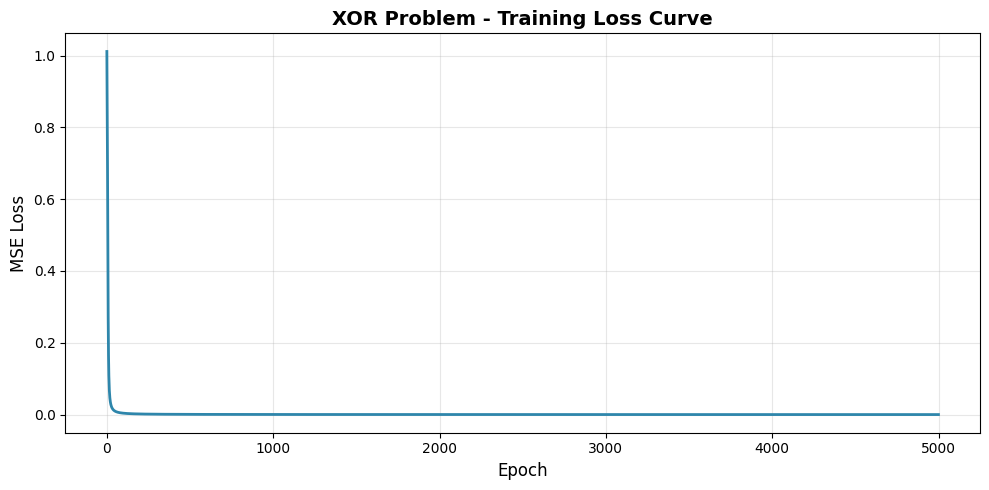

XOR PROBLEM COMPLETED SUCCESSFULLY!


In [ ]:
# Train XOR Network and Evaluate Results

print("\n" + "=" * 60)
print("XOR PROBLEM: Training & Results")
print("=" * 60)

# Train the network
print("\nTraining on XOR problem...")
print("-" * 60)

history = xor_model.fit(
    X_xor, y_xor,
    epochs=5000,
    batch_size=4,
    verbose=False
)

print(f"Training completed!")
print(f"Final loss: {history['loss'][-1]:.6f}")

# Evaluate on training data
print("\n" + "-" * 60)
print("Final Predictions on XOR Inputs:")
print("-" * 60)

y_pred_xor = xor_model.predict(X_xor)

# Create table of results
print(f"\n{'Input (x1, x2)':<20} {'Target':<12} {'Predicted':<12} {'Error':<12}")
print("-" * 56)

correct = 0
for i in range(len(X_xor)):
    x_input = X_xor[i]
    target = y_xor[i, 0]
    pred = y_pred_xor[i, 0]
    error = abs(target - pred)
    
    # Count as correct if prediction rounded matches target
    is_correct = "✓" if (round(pred) == target) else "✗"
    correct += (round(pred) == target)
    
    print(f"({x_input[0]:.0f}, {x_input[1]:.0f})            {target:.4f}       {pred:.4f}       {error:.4f}  {is_correct}")

print("-" * 56)
print(f"\nAccuracy: {correct}/4 ({100*correct/4:.1f}%)")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], linewidth=2, color='#2E86AB')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('XOR Problem - Training Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 60)
print("XOR PROBLEM COMPLETED SUCCESSFULLY!")
print("=" * 60)


VISUALIZATION: Predictions vs Actual Outputs


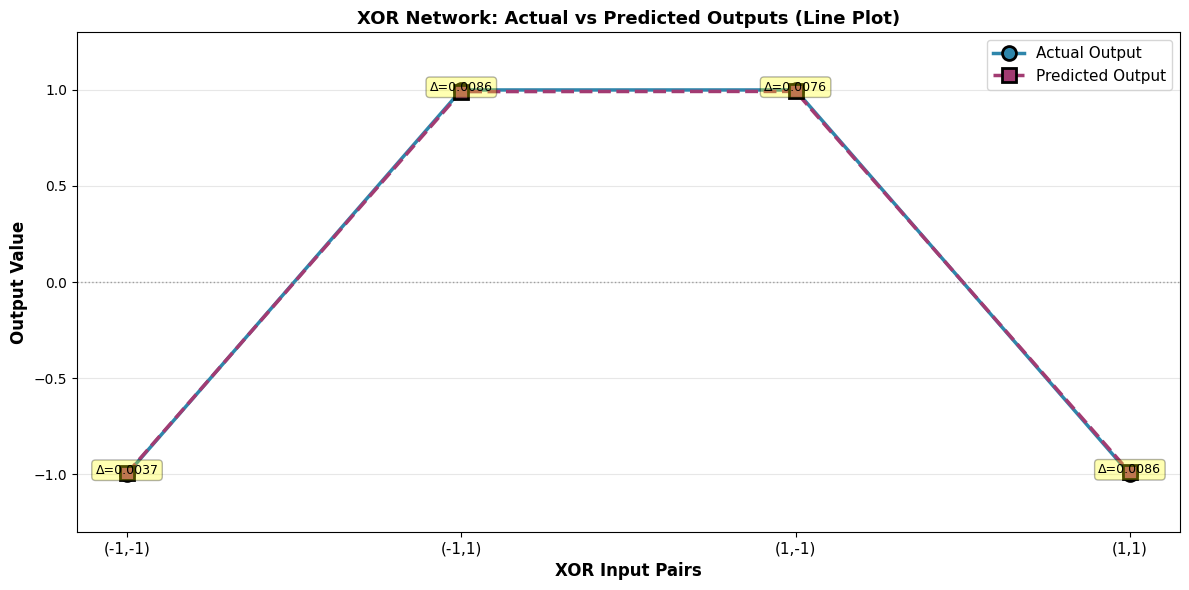


------------------------------------------------------------
Comparison Summary:
------------------------------------------------------------
Mean Absolute Error: 0.007123
Max Error: 0.008599
All predictions correct: Yes ✓


In [ ]:
# Visualize Predictions vs Actual - Scatter Plot

print("\n" + "=" * 60)
print("VISUALIZATION: Predictions vs Actual Outputs")
print("=" * 60)

# Prepare data for visualization
sample_labels = ['(-1,-1)', '(-1,1)', '(1,-1)', '(1,1)']
actual_values = y_xor.flatten()
predicted_values = y_pred_xor.flatten()
x_positions = np.arange(len(sample_labels))

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot scatter points
ax.scatter(x_positions, actual_values, s=300, marker='o', 
          label='Actual Output', color='#2E86AB', edgecolors='black', linewidth=2.5, zorder=5)
ax.scatter(x_positions + 0.1, predicted_values, s=300, marker='s', 
          label='Predicted Output', color='#A23B72', edgecolors='black', linewidth=2.5, zorder=5)

# Add error annotations
for i, (actual, pred) in enumerate(zip(actual_values, predicted_values)):
    error = abs(actual - pred)
    mid_y = (actual + pred) / 2
    ax.annotate(f'Δ={error:.4f}', xy=(i + 0.05, mid_y), fontsize=9, 
               ha='center', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

# Customize plot
ax.set_xlabel('XOR Input Pairs', fontsize=12, fontweight='bold')
ax.set_ylabel('Output Value', fontsize=12, fontweight='bold')
ax.set_title('XOR Network: Actual vs Predicted Outputs (Scatter Plot)', fontsize=13, fontweight='bold')
ax.set_xticks(x_positions)
ax.set_xticklabels(sample_labels, fontsize=11)
ax.set_ylim([-1.3, 1.3])
ax.axhline(y=0, color='gray', linestyle=':', linewidth=1, alpha=0.7)
ax.grid(True, alpha=0.3, axis='y')
ax.legend(fontsize=11, loc='upper right', scatterpoints=1)

plt.tight_layout()
plt.show()

print("\n" + "-" * 60)
print("Comparison Summary:")
print("-" * 60)
errors = np.abs(actual_values - predicted_values)
print(f"Mean Absolute Error: {np.mean(errors):.6f}")
print(f"Max Error: {np.max(errors):.6f}")
print(f"All predictions correct: {'Yes ✓' if np.allclose(np.round(predicted_values), actual_values) else 'No'}")
print("=" * 60)


VISUALIZATION: Decision Boundary


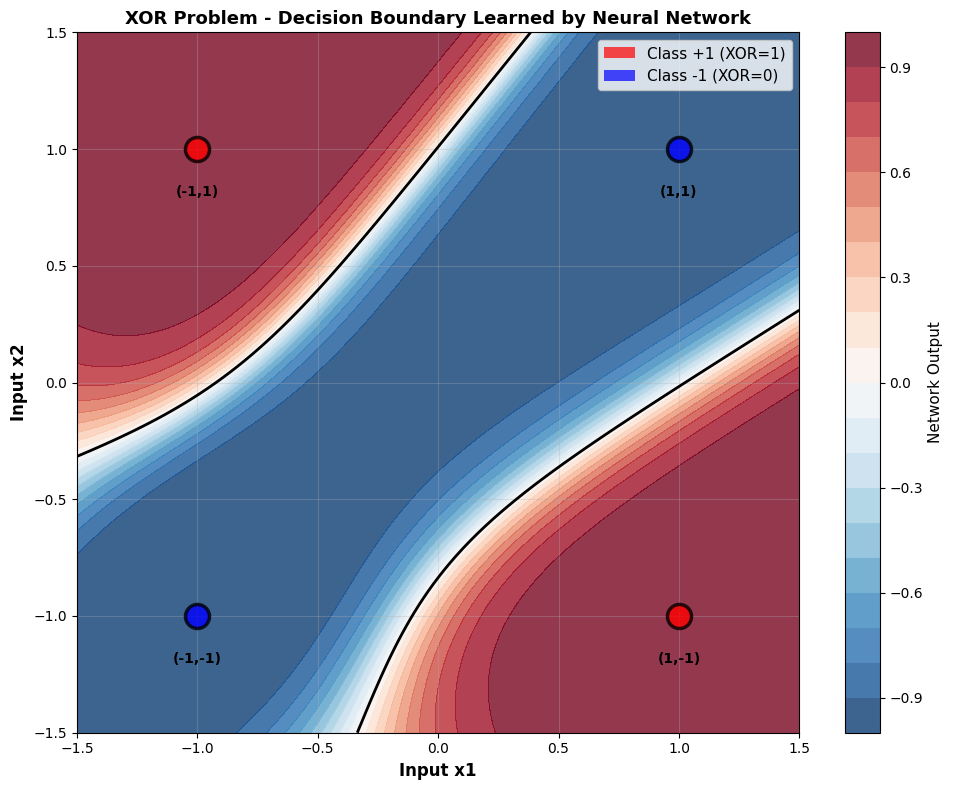

Decision boundary visualization complete!


In [ ]:
# Visualize Decision Boundary

print("\n" + "=" * 60)
print("VISUALIZATION: Decision Boundary")
print("=" * 60)

# Create a mesh grid for decision boundary
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = xor_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot decision boundary as contour
contourf = ax.contourf(xx, yy, Z, levels=20, cmap='RdBu_r', alpha=0.8)
contour = ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)

# Plot training points
colors = ['blue' if y[0] < 0 else 'red' for y in y_xor]
labels = ['-1 (XOR=0)' if y[0] < 0 else '1 (XOR=1)' for y in y_xor]

for i, (x, y, color) in enumerate(zip(X_xor, y_xor, colors)):
    ax.scatter(x[0], x[1], s=300, c=color, marker='o', 
              edgecolors='black', linewidth=2.5, zorder=5, alpha=0.8)
    ax.text(x[0], x[1]-0.2, f'({int(x[0])},{int(x[1])})', 
           ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Input x1', fontsize=12, fontweight='bold')
ax.set_ylabel('Input x2', fontsize=12, fontweight='bold')
ax.set_title('XOR Problem - Decision Boundary Learned by Neural Network', 
            fontsize=13, fontweight='bold')
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('Network Output', fontsize=11)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Class +1 (XOR=1)'),
                  Patch(facecolor='blue', alpha=0.7, label='Class -1 (XOR=0)')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

print("=" * 60)
print("Decision boundary visualization complete!")
print("=" * 60)